In [1]:
!pip install ultralytics==8.0.28 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.6/272.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.1/309.1 kB 15.5 MB/s eta 0:00:00


In [ ]:
import shutil
shutil.rmtree('/content/sample_data')

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="g52GrASCILBnLMBPlLh4")
project = rf.workspace("salstraumen").project("salstraumen-fish-detection")
version = project.version(30)
dataset = version.download("yolov8")




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Salstraumen---fish-detection-30 in yolov8:: 100%|██████████| 4924/4924 [00:01<00:00, 4388.86it/s]


In [3]:
from ultralytics import YOLO

In [4]:
model = YOLO("yolov8s.pt")

100%|██████████| 21.5M/21.5M [00:00<00:00, 161MB/s]
You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


In [5]:
model.train(data="/content/datasets/data.yaml", epochs=30, optimizer= 'Adam', patience=10, cos_lr=True, lr0=1e-3,
             plots=True)

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/data.yaml, epochs=30, patience=10, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, o

In [6]:
from IPython.display import Image

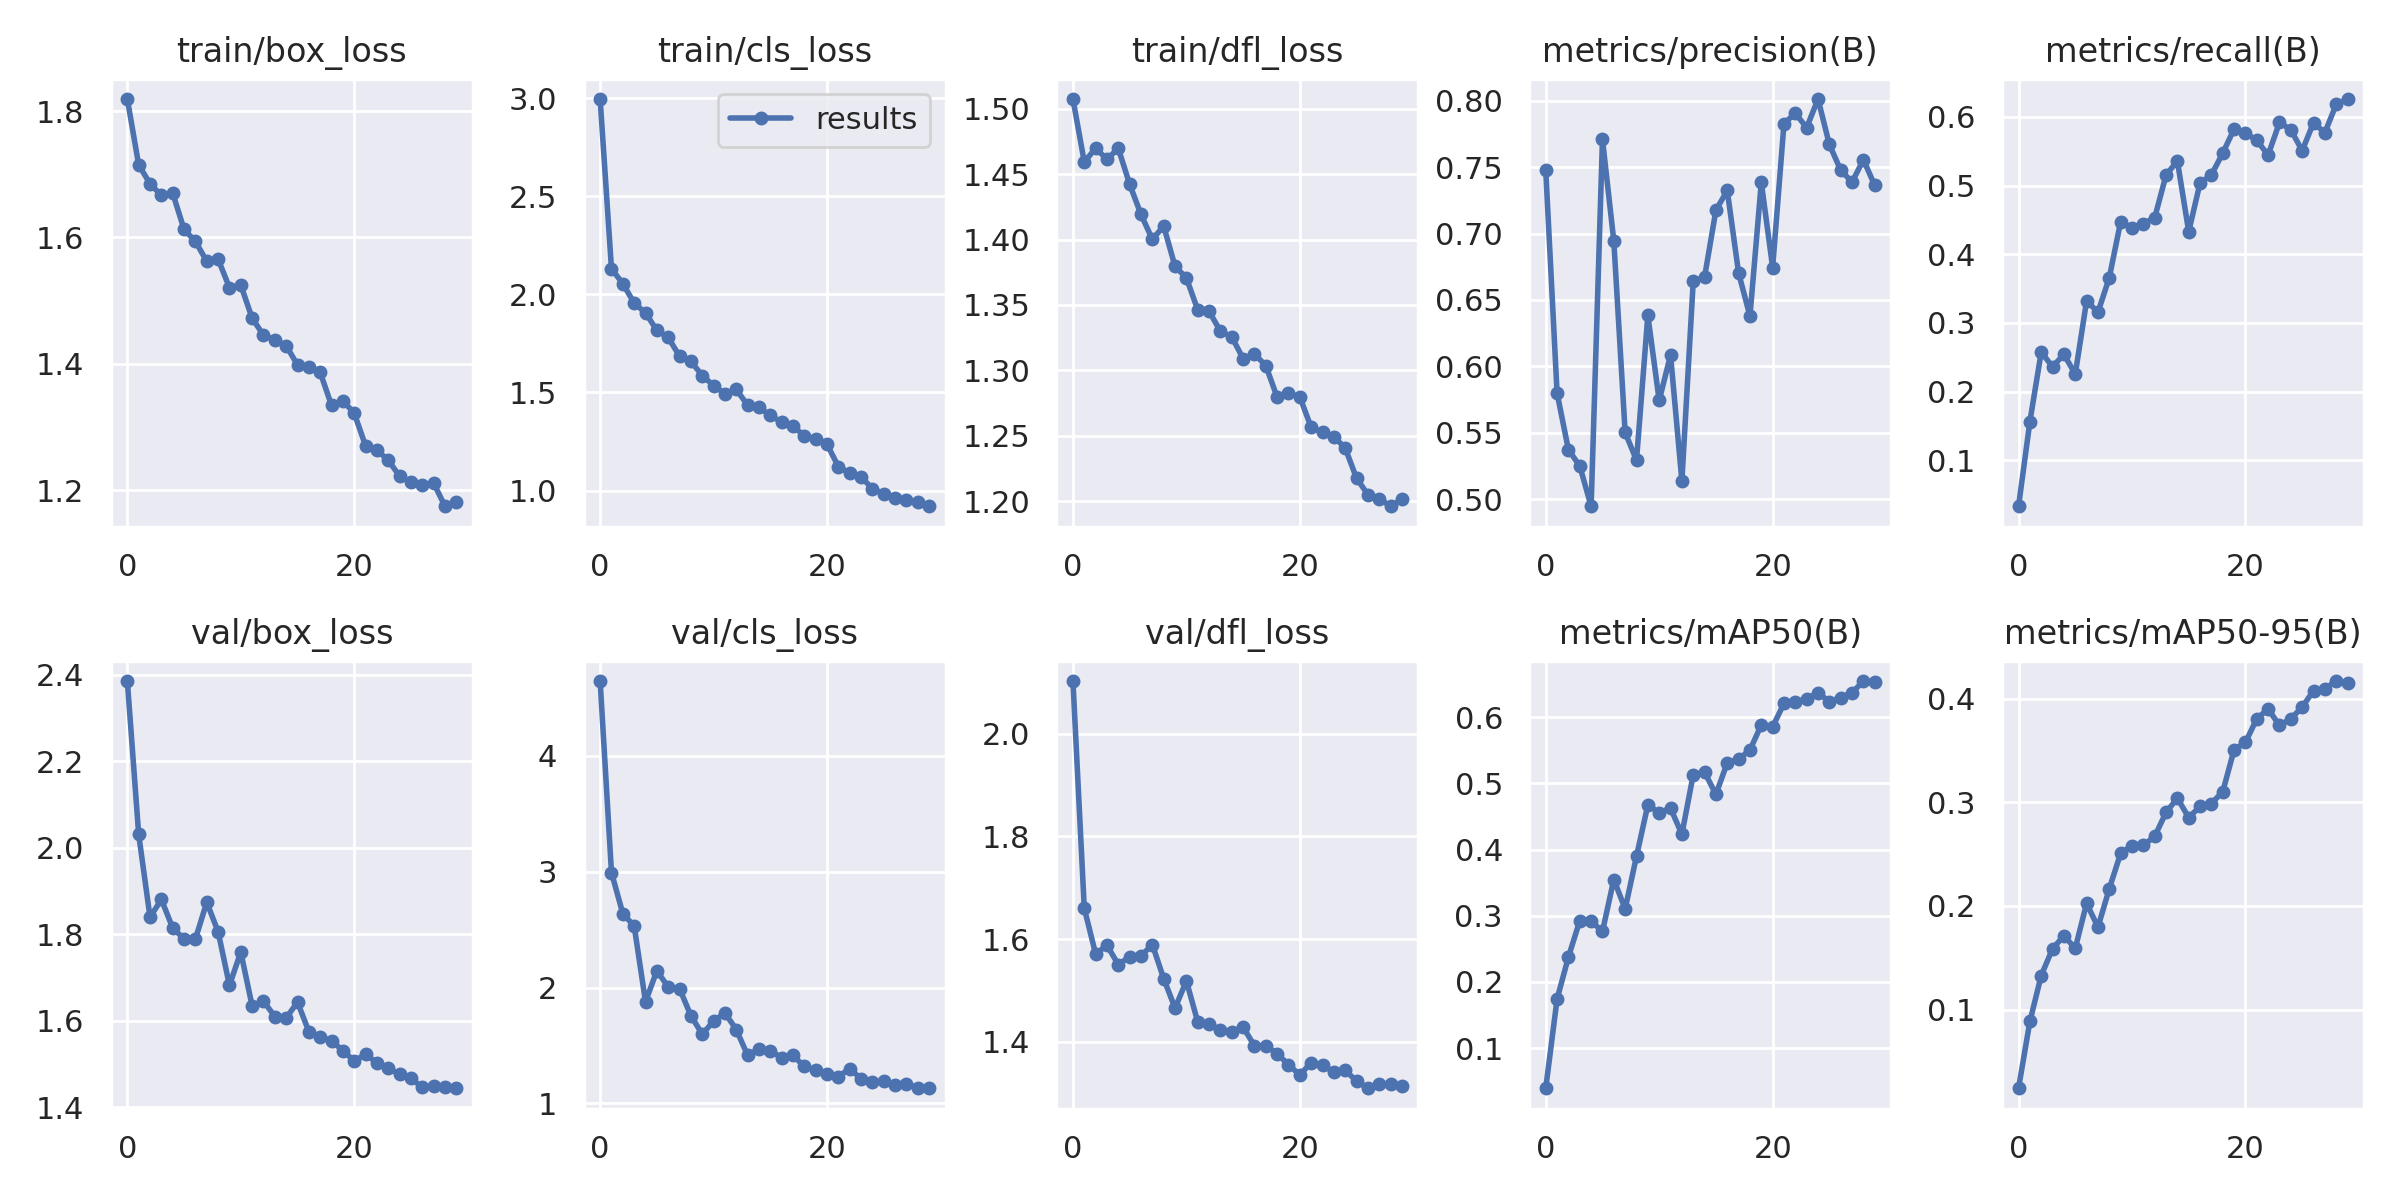

In [7]:
Image('/content/runs/detect/train/results.png')

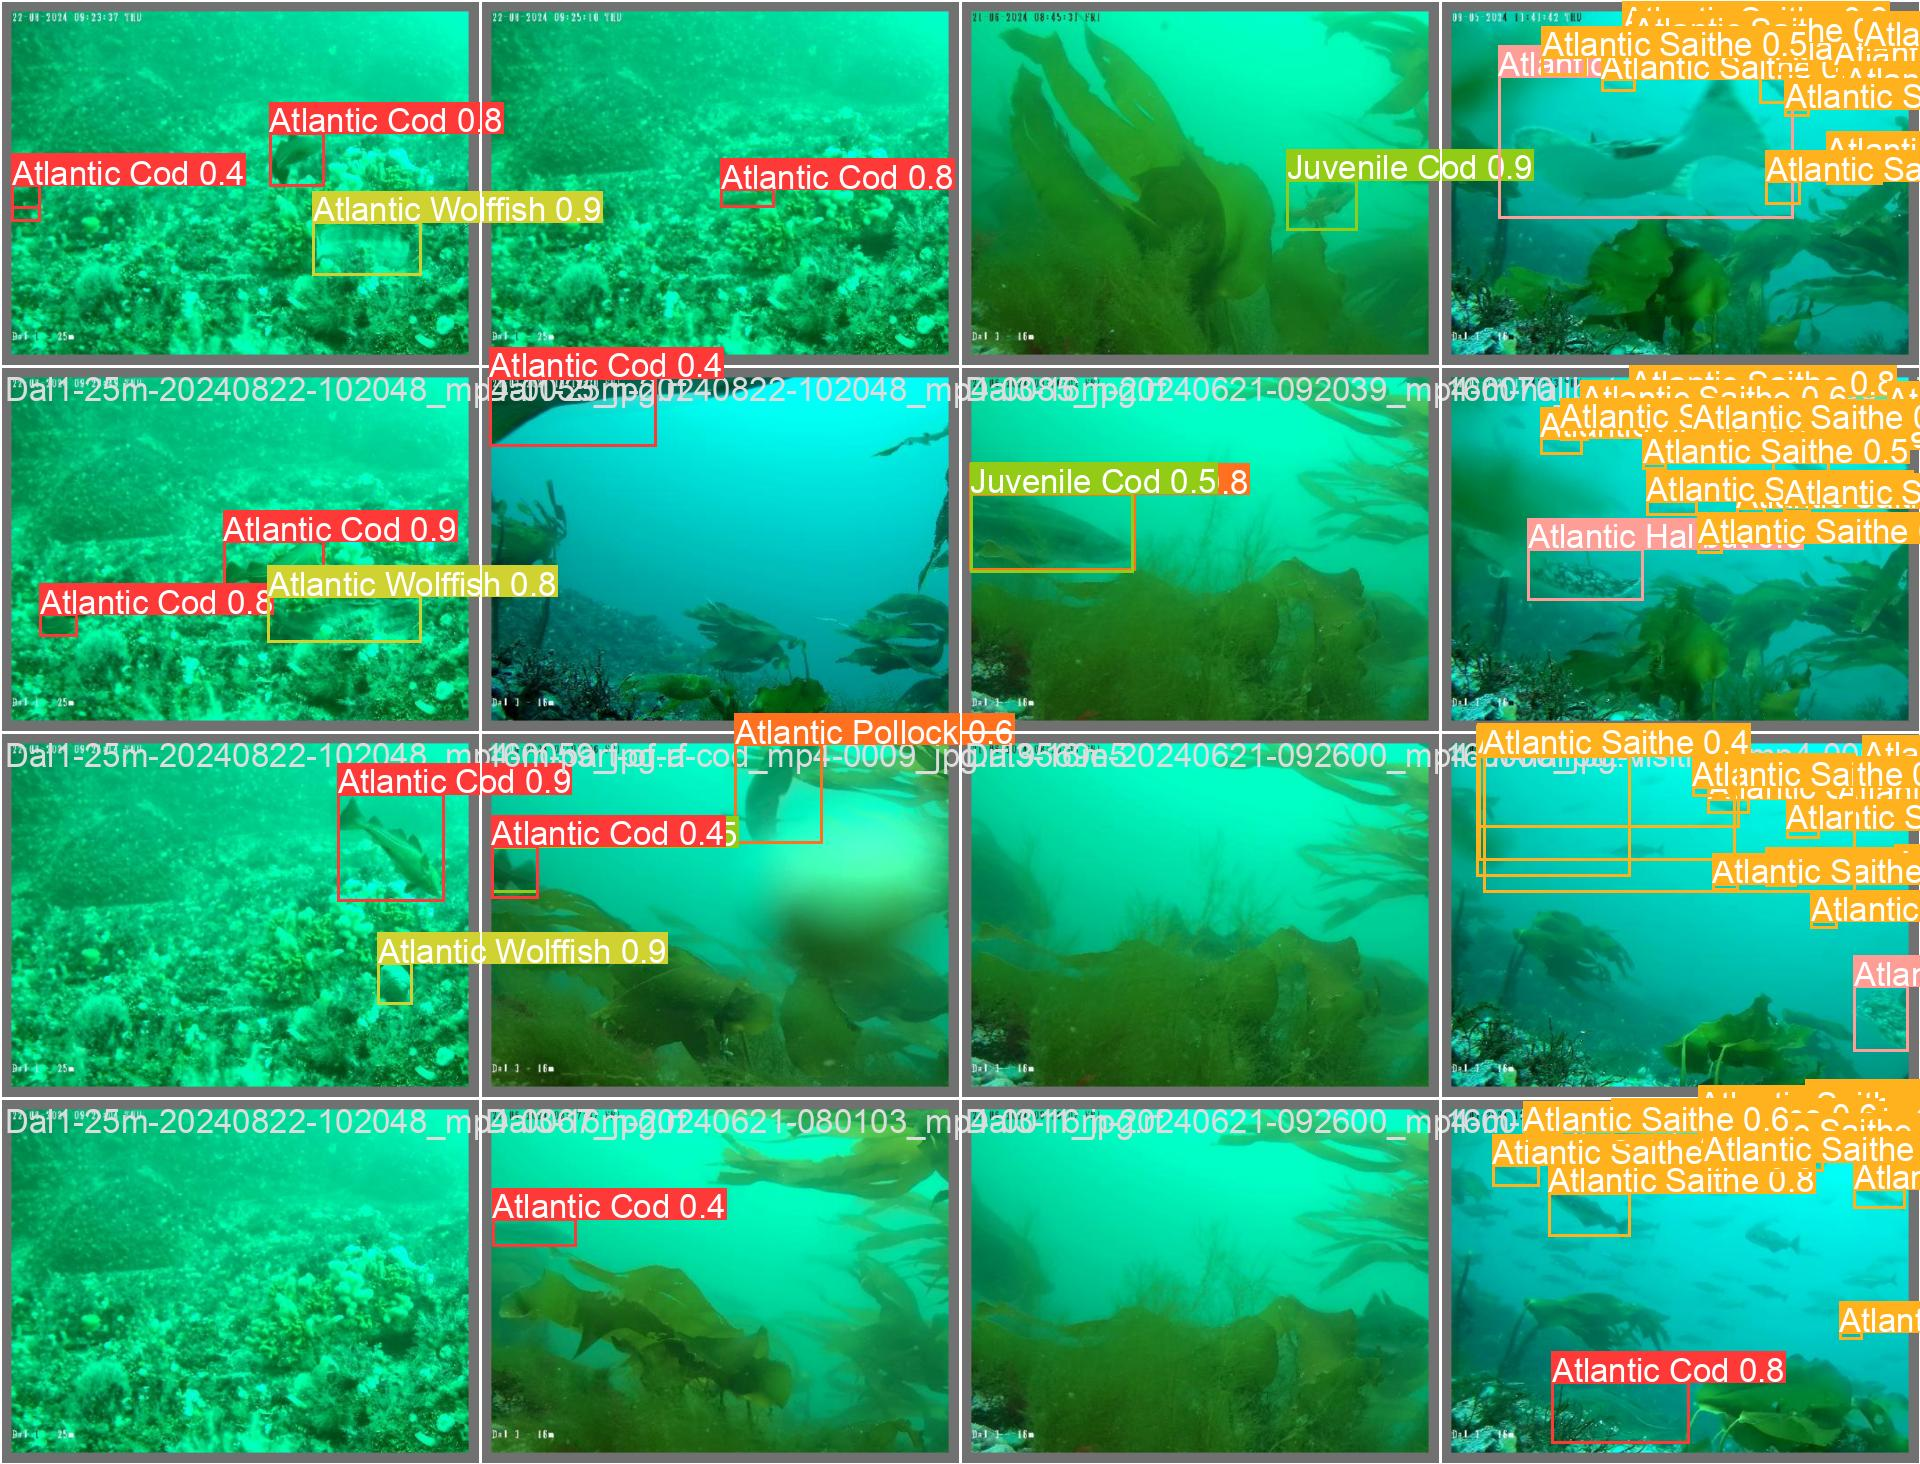

In [8]:
Image('/content/runs/detect/train/val_batch2_pred.jpg')

In [9]:
metrics = model.val()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Salstraumen---fish-detection-30/valid/labels.cache... 209 images, 21 backgrounds, 0 corrupt: 100%|██████████| 209/209 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 192, len(boxes) = 1060. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/14 [00:00<?, ?it/s]os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00

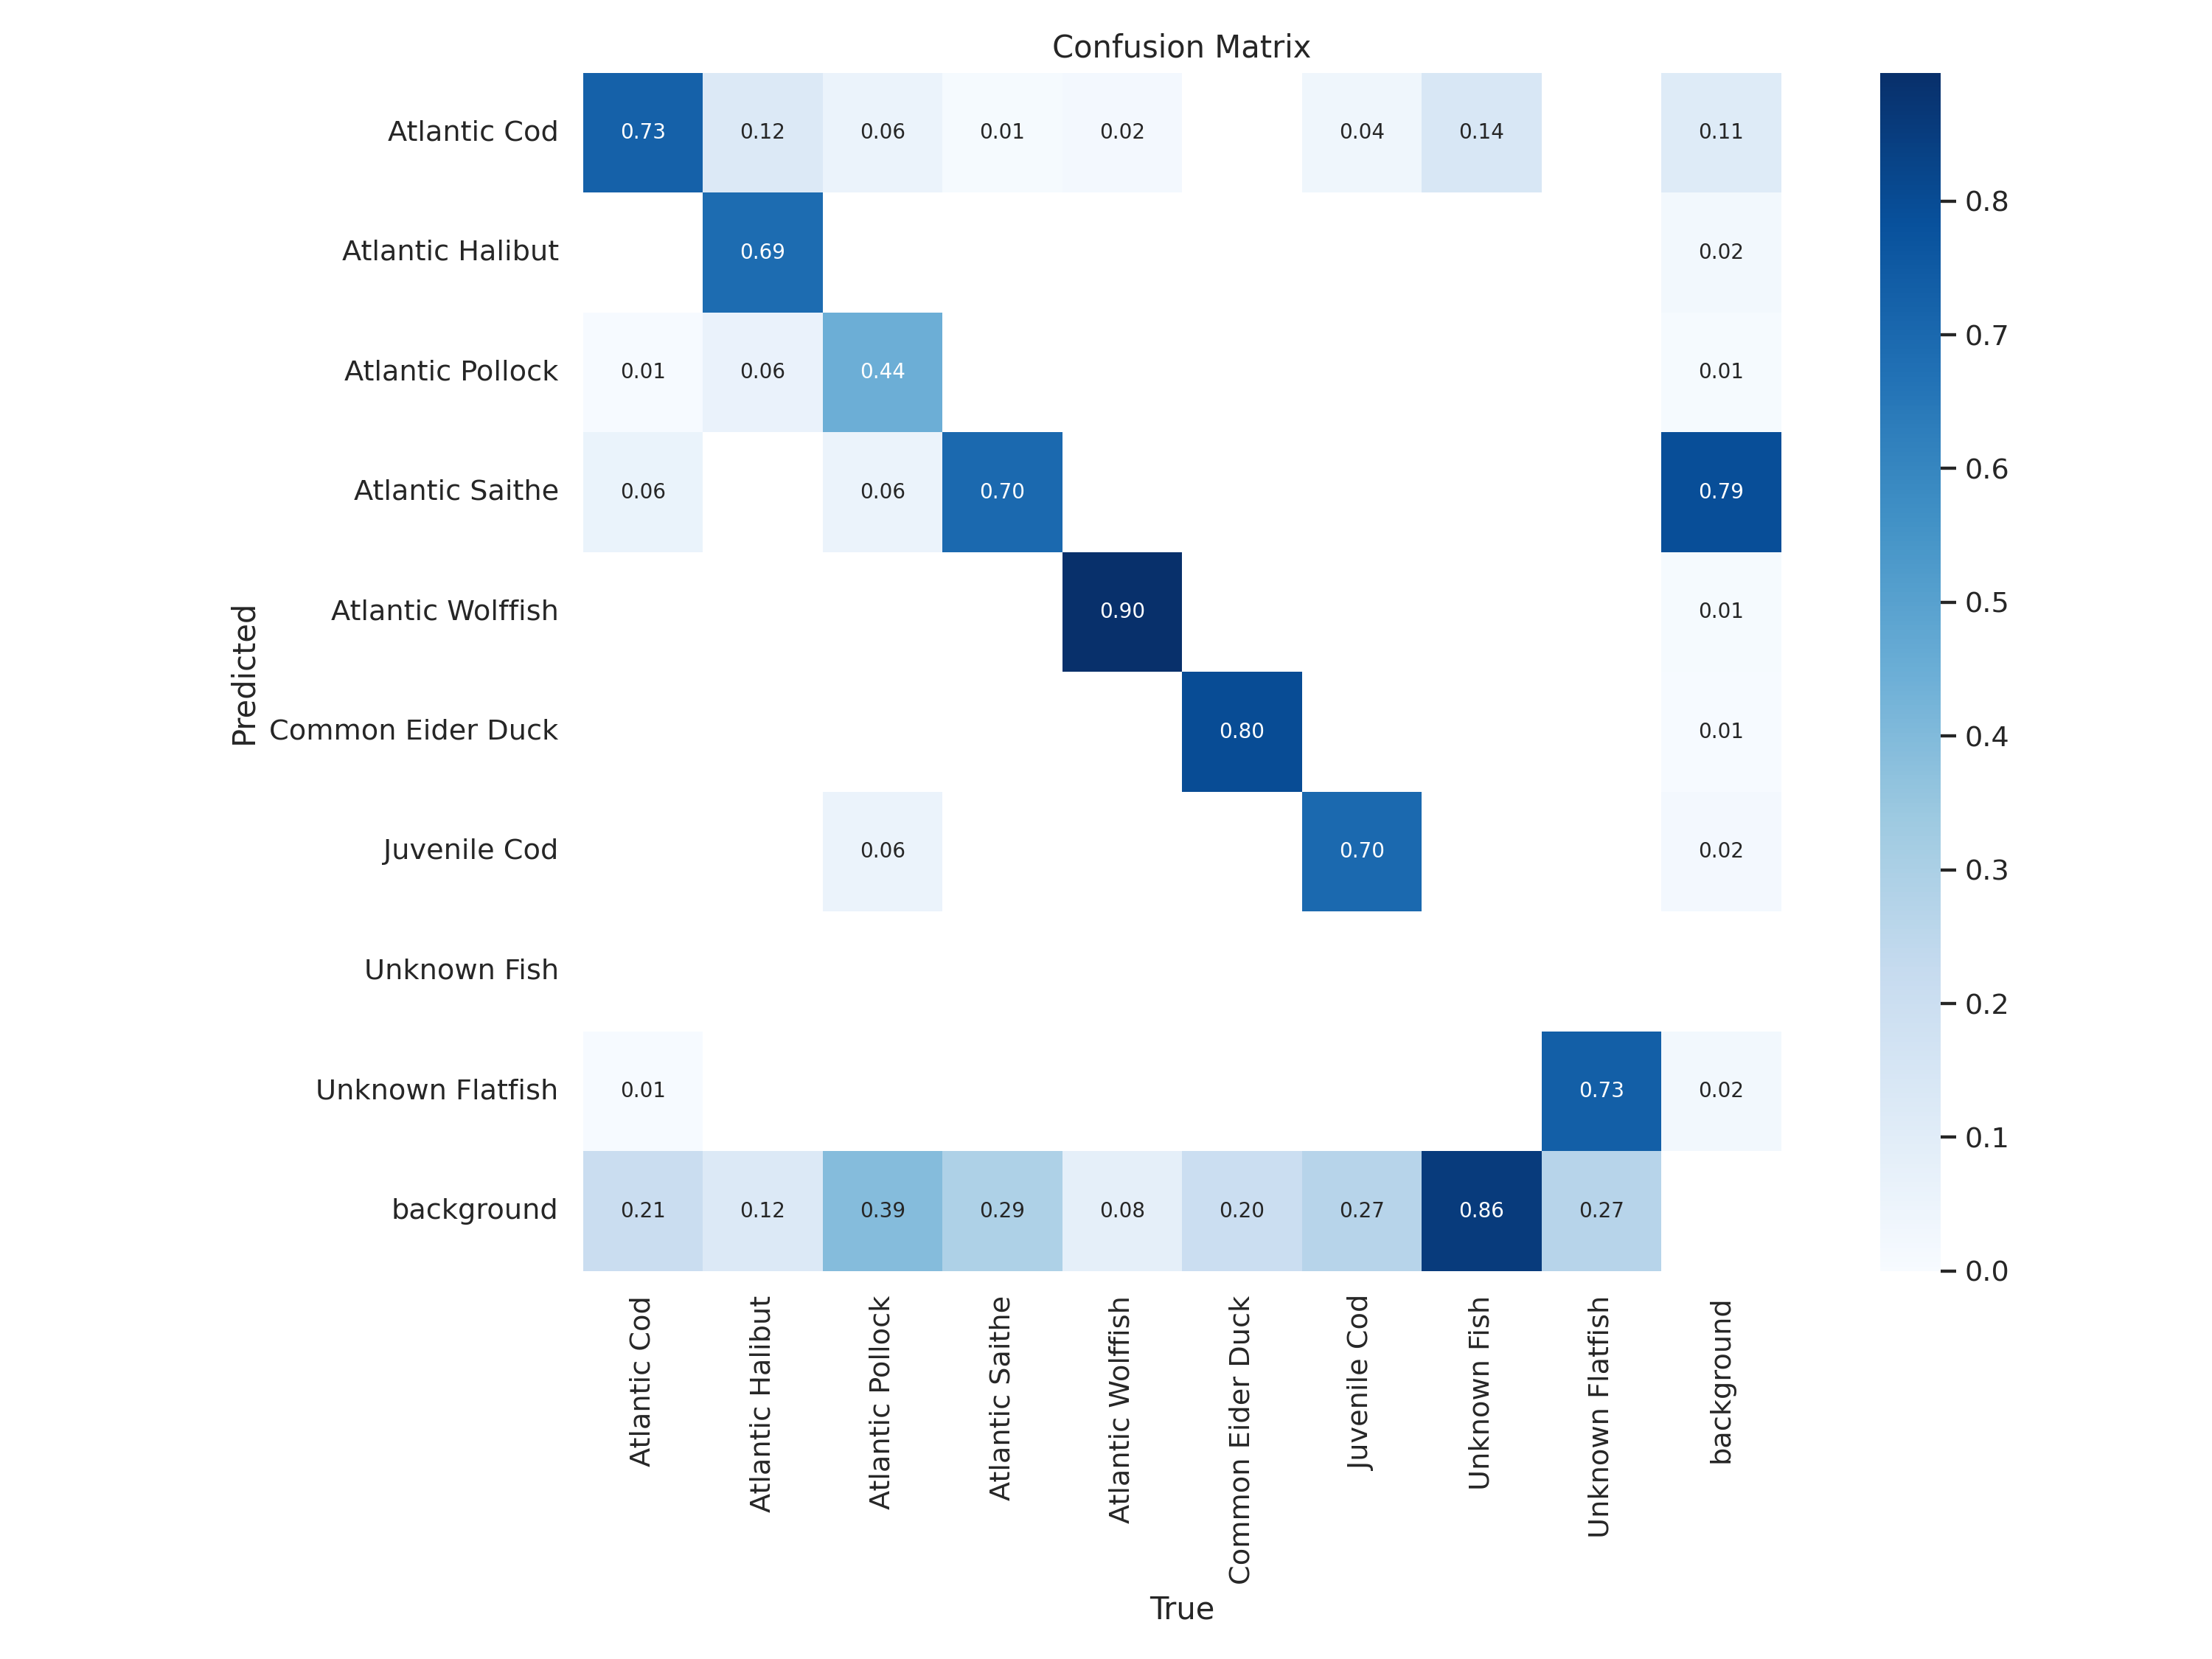

In [10]:
Image('/content/runs/detect/val/confusion_matrix.png')

На матрице четко видна диагональ. В целом результаты неплохие, однако многие рыбы модель принимает за бэкграунд, что неудивительно

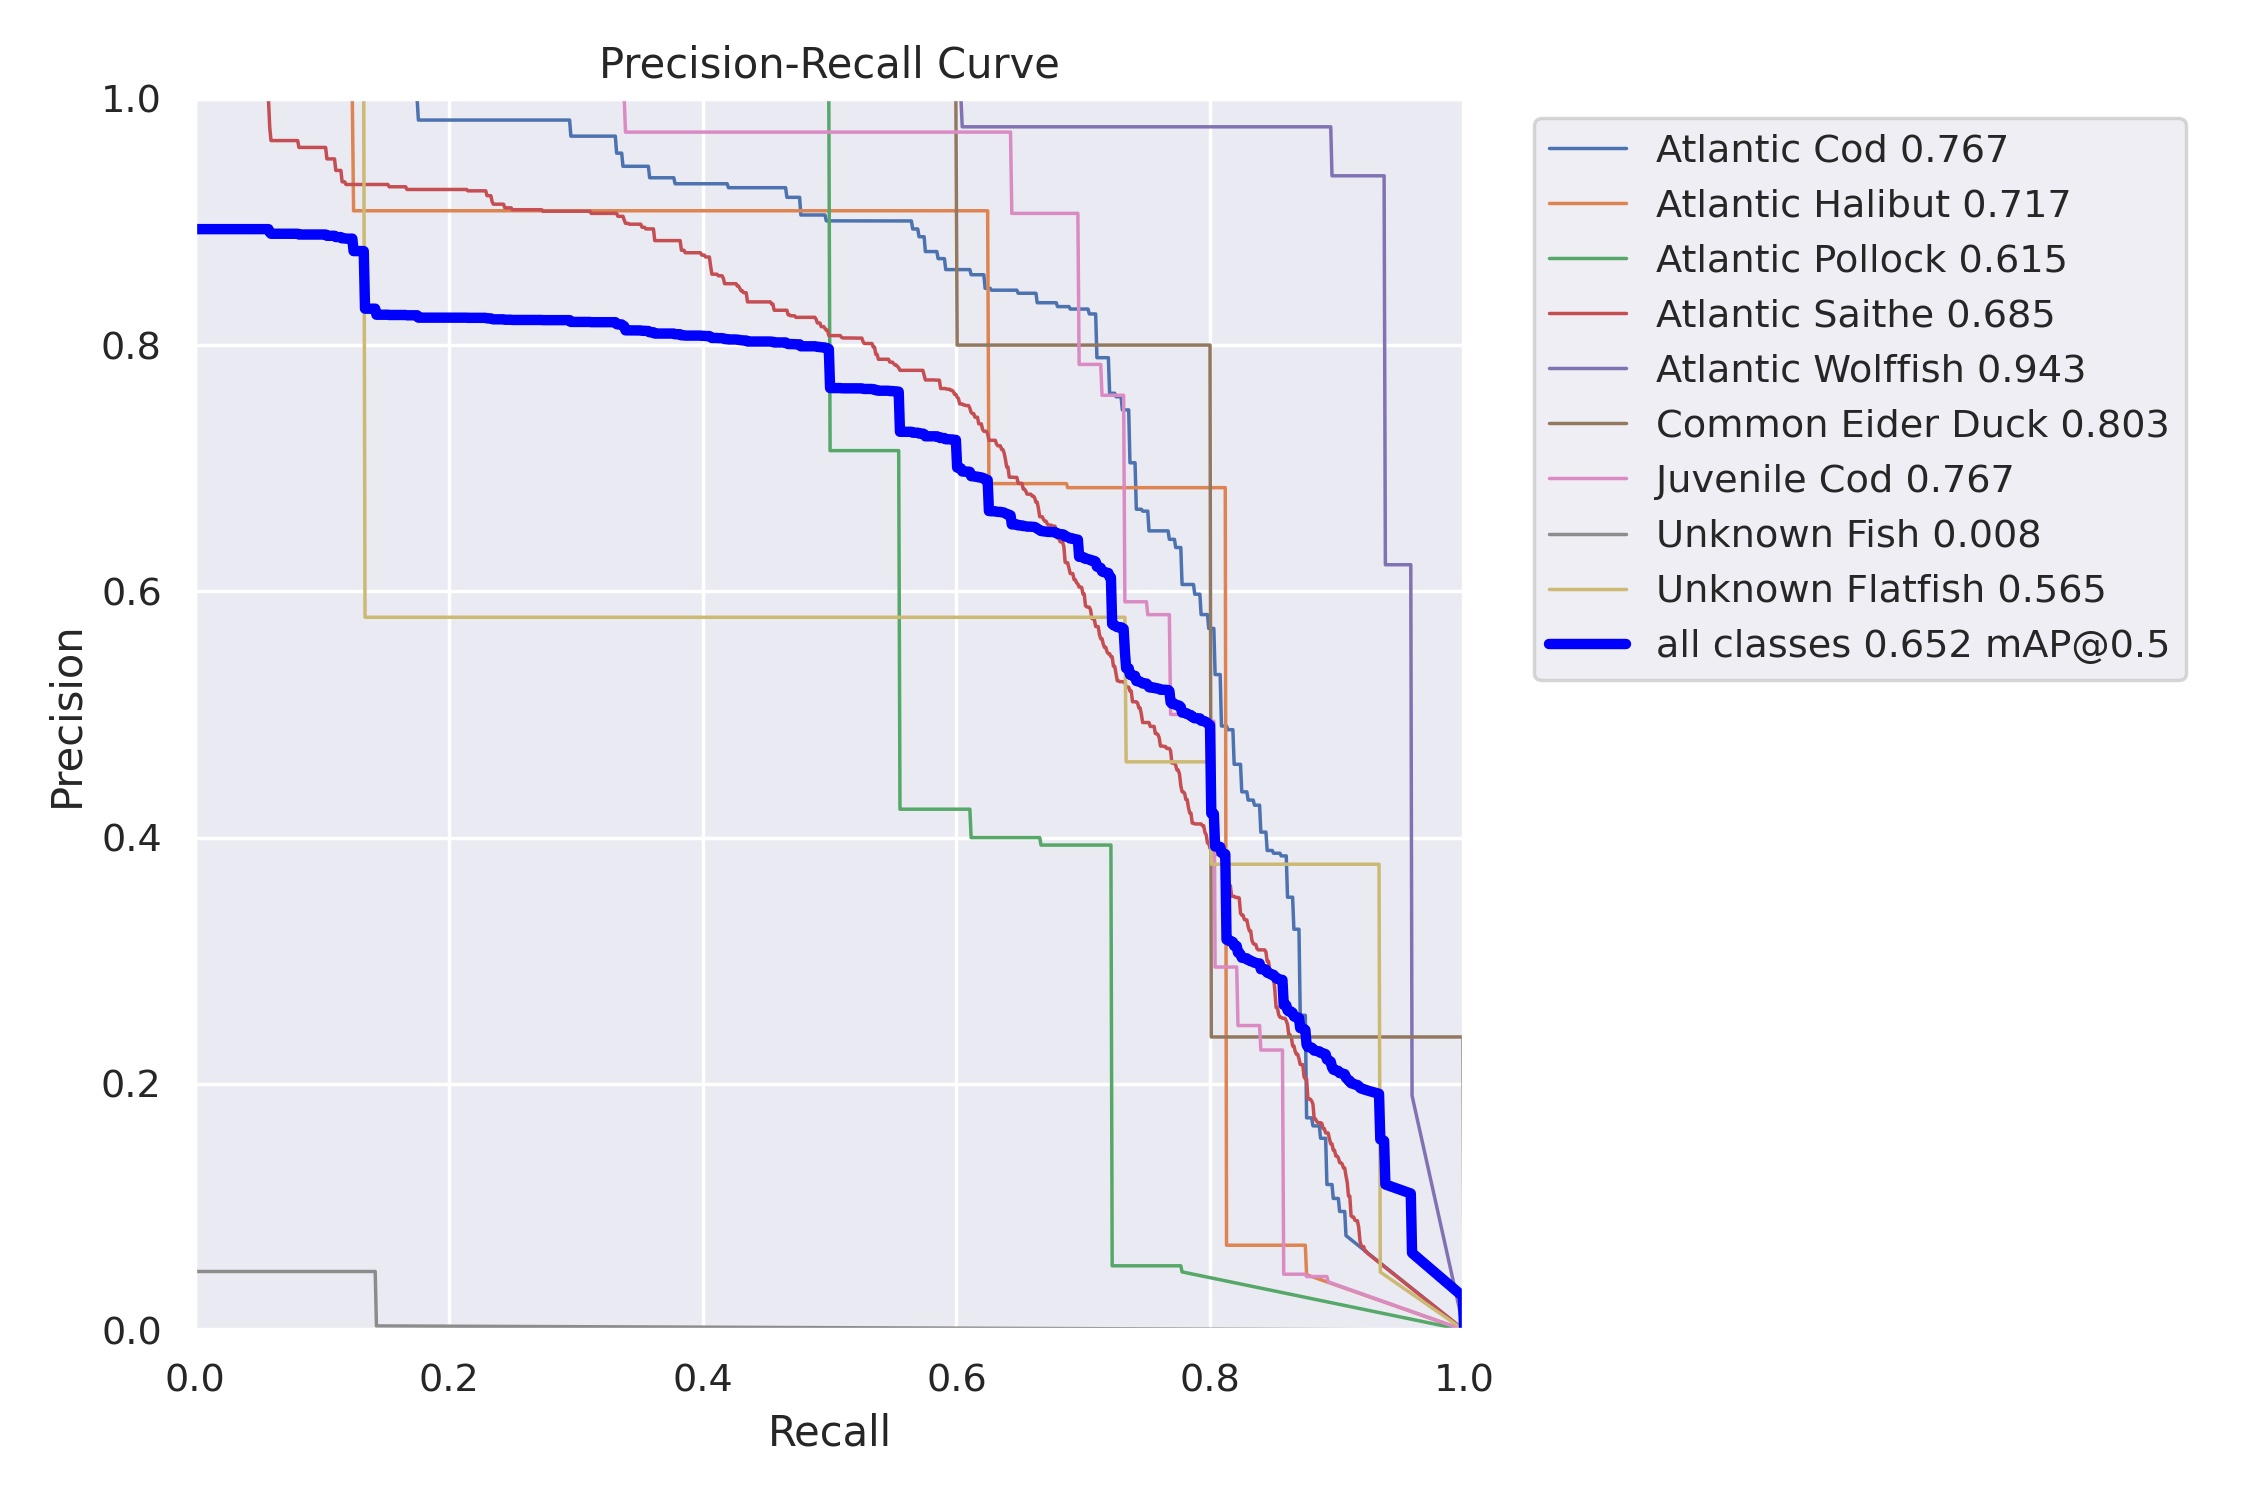

In [13]:
Image('/content/runs/detect/val/PR_curve.png')

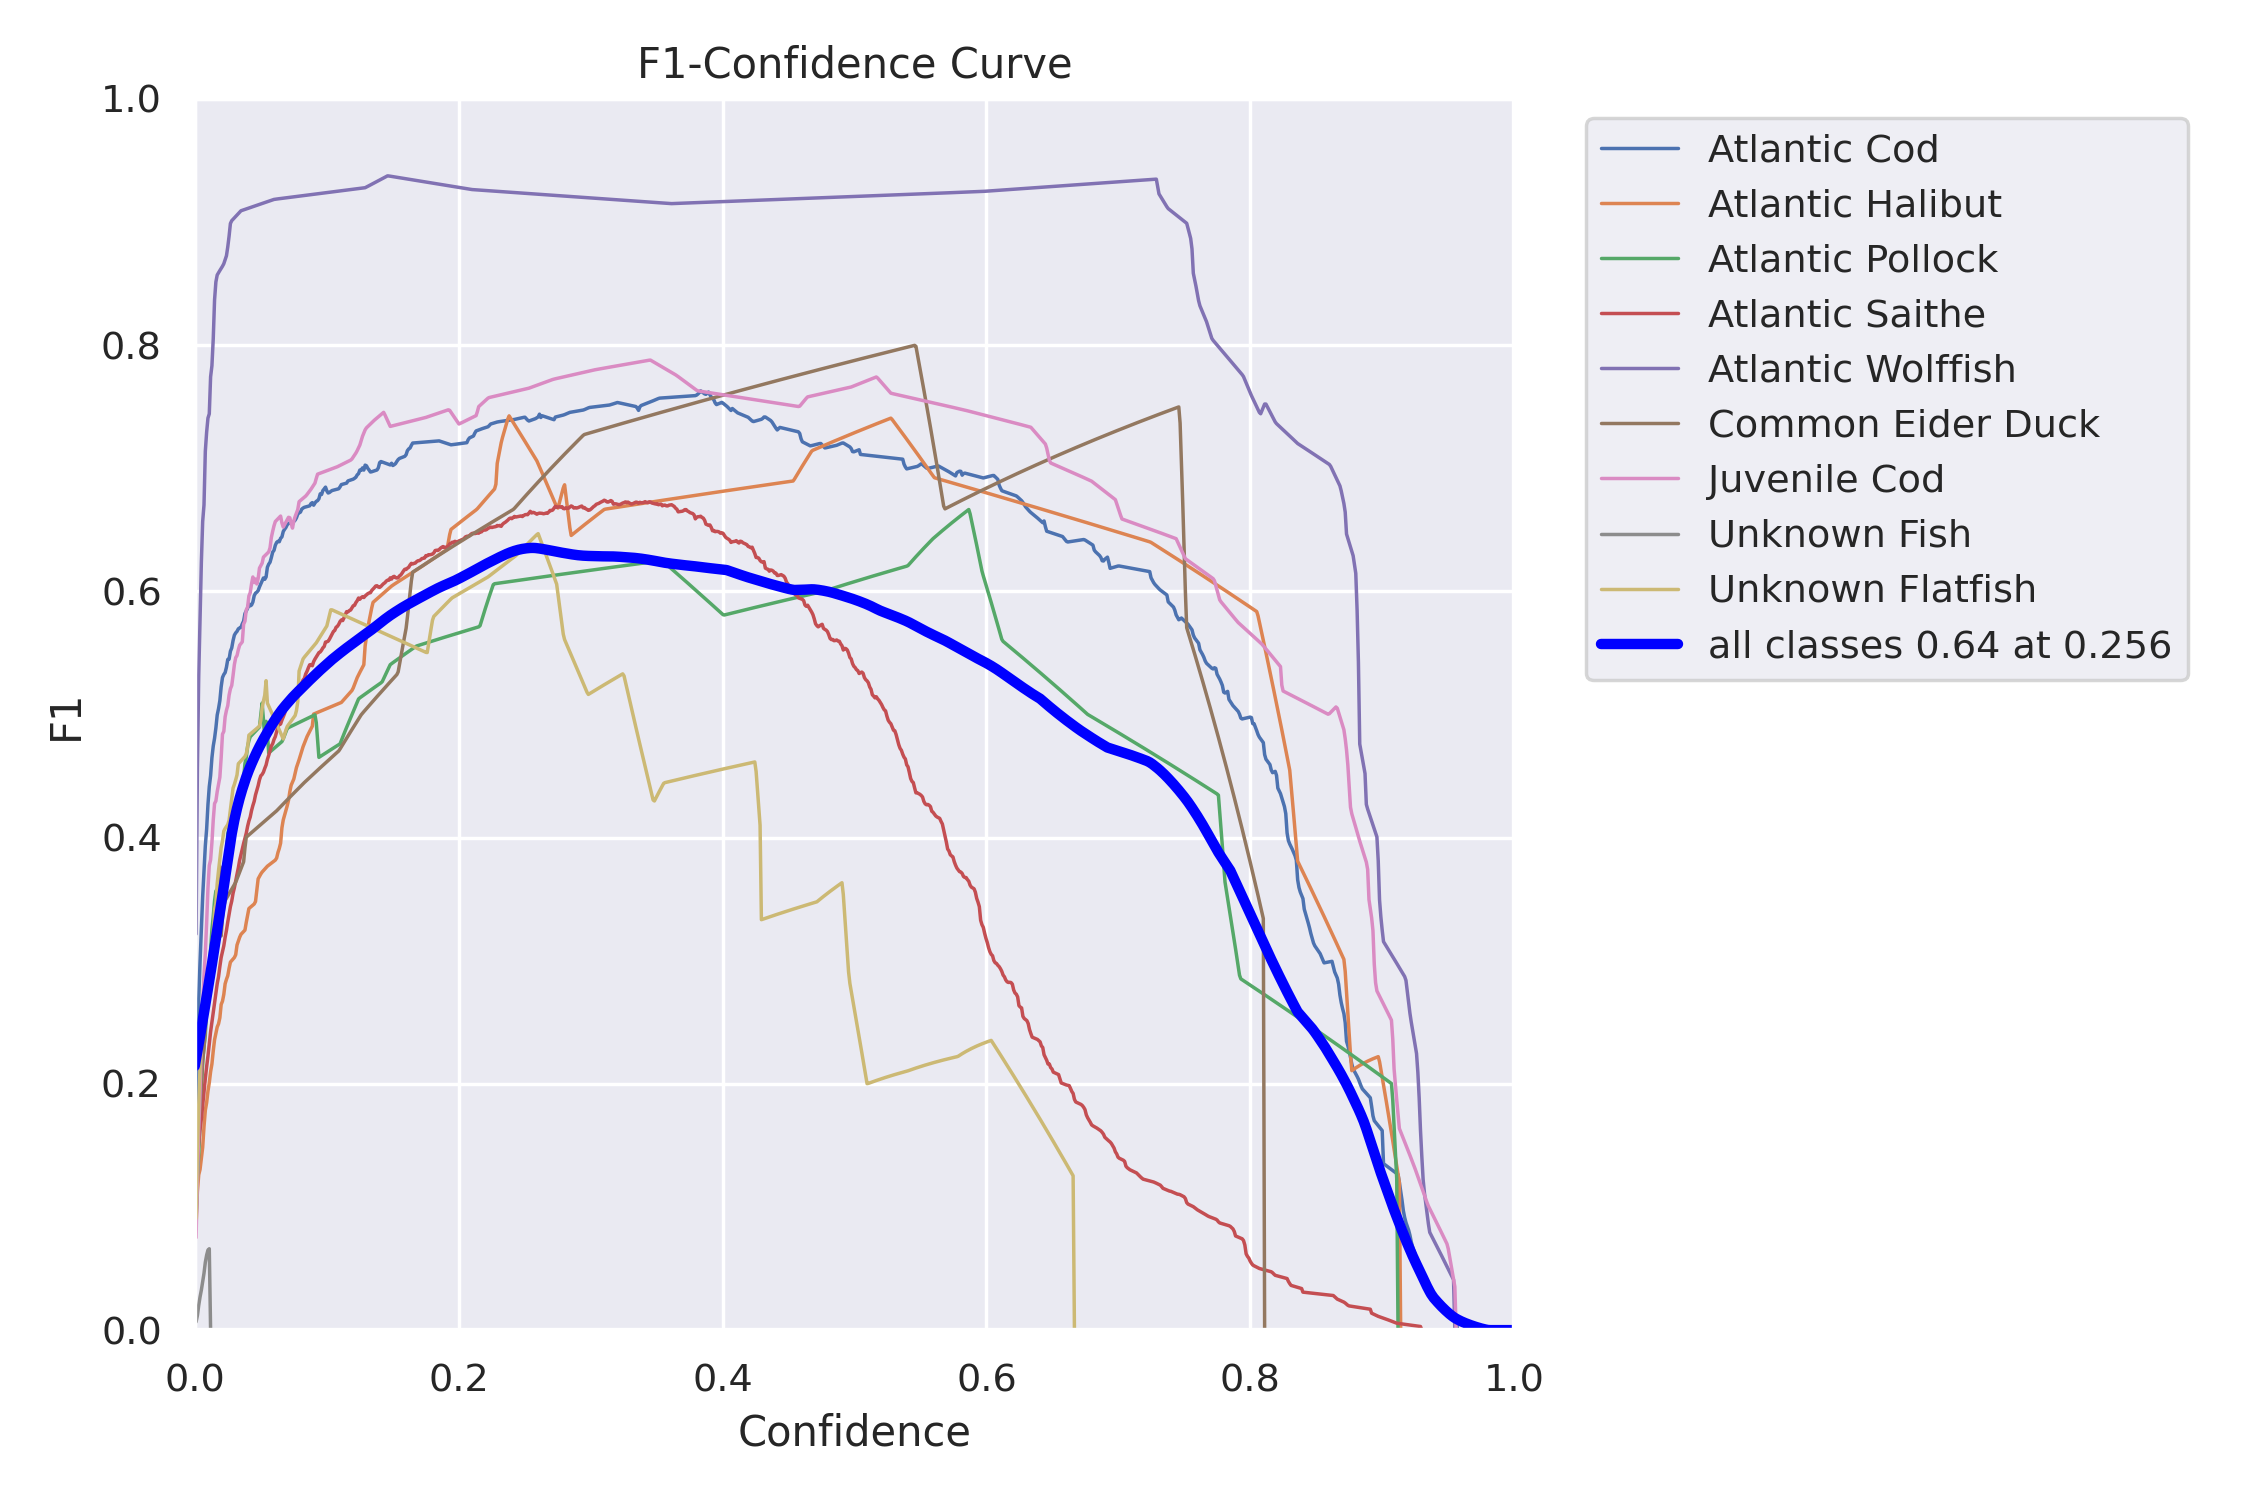

In [14]:
Image('/content/runs/detect/val/F1_curve.png')

In [24]:
model.predict('/content/Atlantic_Pollock.jpg', save=True, imgsz=640, conf=0.1,
              hide_labels=True)


image 1/1 /content/Atlantic_Pollock.jpg: 448x640 1 Atlantic Pollock, 72.3ms
Speed: 0.9ms pre-process, 72.3ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([1, 6])
 dtype: torch.float32
  + tensor([[9.30000e+01, 4.50000e+01, 6.27000e+02, 3.10000e+02, 1.32465e-01, 2.00000e+00]], device='cuda:0')]

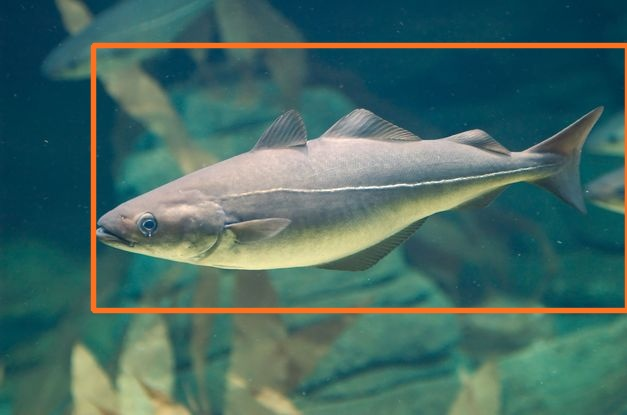

In [25]:
Image('/content/runs/detect/predict/Atlantic_Pollock.jpg')

На датасете результаты хорошие. Кроме того реальную картинку из интернета модель тоже детектировала замечательно!